In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [3]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

In [4]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [5]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
    return summary

In [6]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

In [7]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [8]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)
    plt.show()

In [14]:
data = pd.read_csv("D:\Python\Pizza.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
del data['V2']
print(data)

    V1     V3     V4     V5    V6    V7     V8    V9
0    A  27.82  21.43  44.87  5.11  1.77   0.77  4.93
1    A  28.49  21.26  43.89  5.34  1.79   1.02  4.84
2    A  28.35  19.99  45.78  5.08  1.63   0.80  4.95
3    A  30.55  20.15  43.13  4.79  1.61   1.38  4.74
4    A  30.49  21.28  41.65  4.82  1.64   1.76  4.67
..  ..    ...    ...    ...   ...   ...    ...   ...
295  J  44.91  11.07  17.00  2.49  0.66  25.36  2.91
296  J  43.15  11.79  18.46  2.43  0.67  24.17  3.10
297  J  44.55  11.01  16.03  2.43  0.64  25.98  2.92
298  J  47.60  10.43  15.18  2.32  0.56  24.47  2.76
299  J  46.84   9.91  15.50  2.27  0.57  25.48  2.81

[300 rows x 8 columns]


In [15]:
X = data.loc[:,"V3":] # independent variables data
y = data.V1 # dependent variable data
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
pca = PCA().fit(standardisedX)
summary = pca_summary(pca, standardisedX,False)
print(summary)

                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           2.042494               0.595969              0.595969
PC2           1.513426               0.327208              0.923177
PC3           0.643865               0.059223              0.982400
PC4           0.308503               0.013596              0.995997
PC5           0.166364               0.003954              0.999950
PC6           0.018374               0.000048              0.999999
PC7           0.003085               0.000001              1.000000


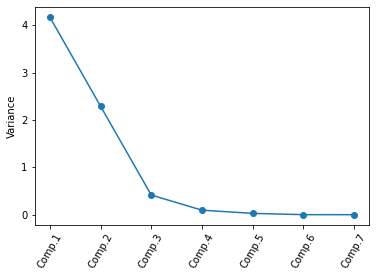

     Standard deviation
PC1            4.171782
PC2            2.290457
PC3            0.414562
PC4            0.095174
PC5            0.027677
PC6            0.000338
PC7            0.000010
     Cumulative Proportion
PC1               0.595969
PC2               0.923177
PC3               0.982400
PC4               0.995997
PC5               0.999950
PC6               0.999999
PC7               1.000000


In [20]:
screeplot(pca, standardisedX)
print(summary.sdev**2)
print(summary.cumprop)

## Loadings for the Principal Components

In [22]:
print(pca.components_[0])
print(pca.components_[1])

[ 0.06470937  0.3787609   0.44666592  0.47188953  0.43570289 -0.42491371
  0.2444873 ]
[-0.62827587 -0.26970665  0.23437908 -0.11099042  0.20166165  0.32031208
  0.56745756]


In [24]:
print(calcpc(standardisedX, pca.components_[0]))
#print(calcpc(standardisedX, pca.components_[1]))

[ 5.01034284  5.02375538  4.8054393   4.4695434   4.47189256  4.50479978
  4.31535781  4.75785167  4.85461934  4.91640631  4.84099582  4.89136871
  4.61075407  4.42153254  4.46677678  4.75343467  4.44513083  4.20201792
  4.49687192  4.60756167  4.85726834  4.82265249  4.51834142  4.25395639
  4.48975064  4.5415983   4.63411775  4.46880183  4.75034835  1.86118455
  1.31234408  1.76567377  1.67139319  1.59326652  1.75214117  1.79769844
  1.286141    0.98536152  1.59570217  1.66692136  1.6845547   1.79800953
  1.75061615  1.01729263  0.96090738  1.06044938  1.69385387  1.83131552
  1.52979499  1.62269178  1.78981468  1.72759525  1.79232263  1.77583723
  1.22040739  1.54381467  1.70900086  1.75775457  1.2110394   1.28189732
  1.3733351   1.15302122  1.14451053  1.22366524  1.24542212  0.89628008
  1.01190454  1.30418459  0.64245467  1.15053786  0.89464272  0.96134848
  1.59575164  1.29185378  1.06187896  0.81162826  1.02066449  1.38747555
  1.3004686   1.32731252  1.02507197  0.57003212  0

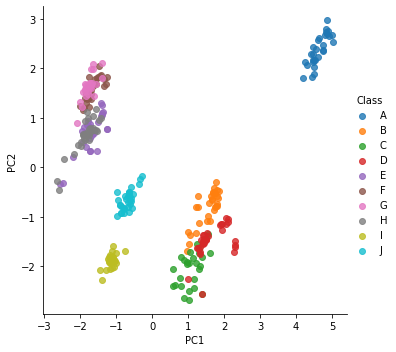

In [25]:
pca_scatter(pca, standardisedX, y)